# Trabajo Práctico 3

Karen Raczkowski

In [1]:
import numpy as np
import scipy.fftpack as fft
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
import os
import imutils

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs / images a partir del template Material_TPs / template
1. Obtener una detección del logo en cada imagen sin falsos positivos.

In [205]:
def detectar_logo(imagen_ruta, plantilla_ruta, escala):
    # Cargar y convertir la imagen de entrada
    img = cv.imread(imagen_ruta)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Cargar y redimensionar la plantilla con inversión de colores
    pattern = cv.imread(plantilla_ruta, 0)
    img_template = cv.bitwise_not(cv.resize(pattern, (int(pattern.shape[1] * escala), int(pattern.shape[0] * escala))))

    # Aplicar Canny a la imagen de entrada y la plantilla
    edges_img = cv.Canny(img_gray, 50, 500)
    edges_template = cv.Canny(img_template, 50, 200)

    # Realizar la coincidencia de plantillas utilizando Canny y umbral dado
    res = cv.matchTemplate(edges_img, edges_template, eval('cv.TM_CCOEFF_NORMED'))

    # Obtener las coordenadas de la ubicación con la máxima coincidencia
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    w, h = img_template.shape[::-1]
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img, top_left, bottom_right, (255, 0, 0), 2)

    # Visualización
    plt.subplot(121)
    plt.imshow(res, cmap='gray')
    plt.title('Matching Result')
    plt.subplot(122)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point')
    plt.show()

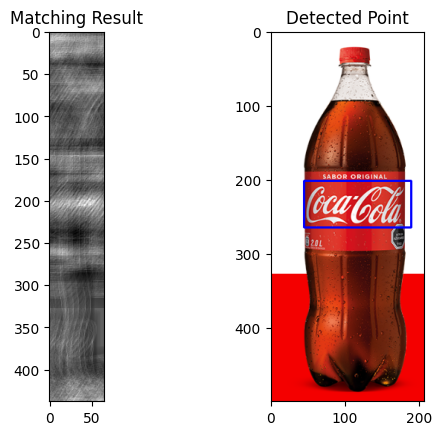

In [206]:
detectar_logo('./images/coca_logo_1.png', './template/pattern.png', 0.36)

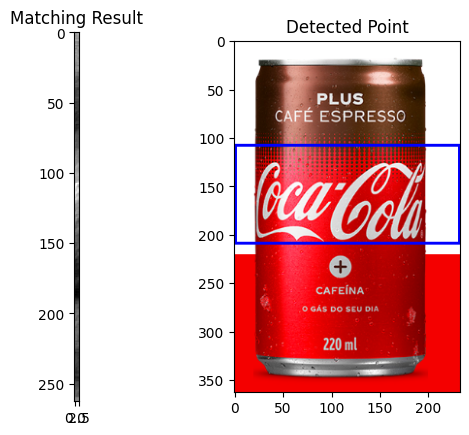

In [207]:
detectar_logo('./images/coca_logo_2.png', './template/pattern.png', 0.58)

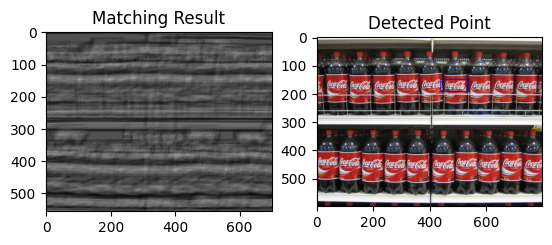

In [208]:
detectar_logo('./images/coca_multi.png', './template/pattern.png', 0.25)

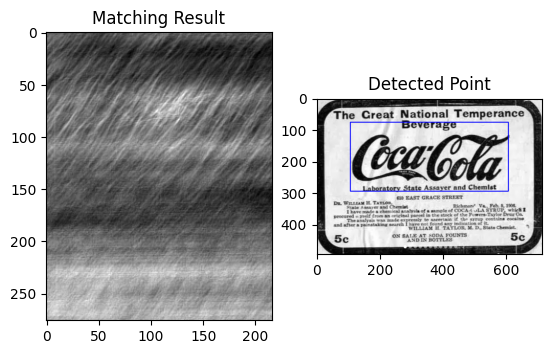

In [209]:
detectar_logo('./images/coca_retro_1.png', './template/pattern.png', 1.25)

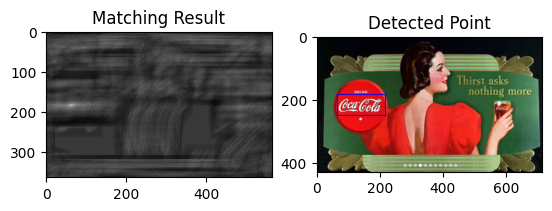

In [210]:
detectar_logo('./images/coca_retro_2.png', './template/pattern.png', 0.38)

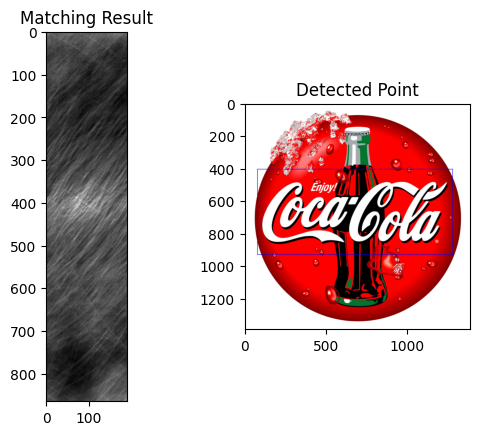

In [211]:
detectar_logo('./images/COCA-COLA-LOGO.jpg', './template/pattern.png', 3)

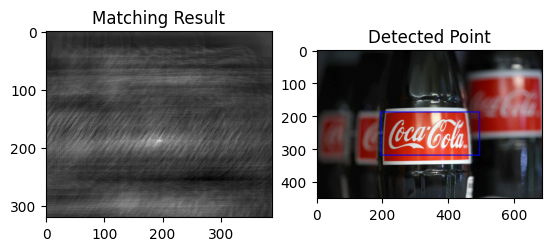

In [212]:
detectar_logo('./images/logo_1.png', './template/pattern.png', 0.75)

2. Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1.

Text(0.5, 1.0, 'Resultado')

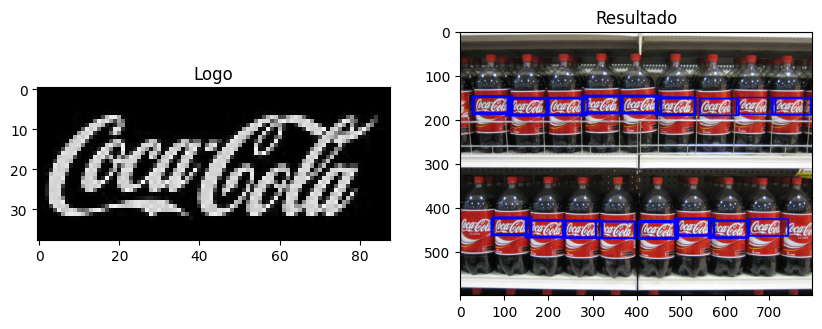

In [213]:
# Cargar y convertir imagenes
img = cv.imread('./images/coca_multi.png')
img_rgb  = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
pattern = cv.imread('./template/pattern.png', 0)
# Redimensionar y realizar inversión de colores en la plantilla
scale = 0.222
img_template = cv.bitwise_not(cv.resize(pattern, (int(pattern.shape[1] * scale), int(pattern.shape[0] * scale))))

w, h = img_template.shape[::-1]
# Realizar la coincidencia de plantillas utilizando el método de correlación normalizada
res = cv.matchTemplate(img_gray,img_template,cv.TM_CCORR_NORMED)

# Encontrar las coordenadas donde el valor en el mapa de coincidencia es mayor o igual al umbral
umbral = 0.63
loc = np.where( res >= umbral)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

# Visualización
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_template, cmap='gray')
plt.title('Logo')
plt.subplot(122)
plt.imshow(img_rgb)
plt.title('Resultado')

3. Generalizar el algoritmo del item 2 para todas las imágenes. Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

In [200]:
def detectar_logos(imagen_ruta, plantilla_ruta, umbral, escala):
    # Cargar y convertir la imagen de entrada
    img = cv.imread(imagen_ruta)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

    # Cargar y redimensionar la plantilla con inversión de colores
    pattern = cv.imread(plantilla_ruta, 0)
    img_template = cv.bitwise_not(cv.resize(pattern, (int(pattern.shape[1] * escala), int(pattern.shape[0] * escala))))

    w, h = img_template.shape[::-1]

    # Realizar la coincidencia de plantillas utilizando el método de correlación normalizada
    res = cv.matchTemplate(img_gray, img_template, cv.TM_CCORR_NORMED)

    # Encontrar las coordenadas donde el valor en el mapa de coincidencia es mayor o igual al umbral
    loc = np.where(res >= umbral)

    # Dibujar rectángulos alrededor de las ubicaciones encontradas en la imagen de entrada original
    for pt in zip(*loc[::-1]):
        cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

    # Visualización
    plt.figure(figsize=(10, 10))
    plt.subplot(121)
    plt.imshow(img_template, cmap='gray')
    plt.title('Logo')
    plt.subplot(122)
    plt.imshow(img_rgb)
    plt.title('Resultado')
    plt.show()

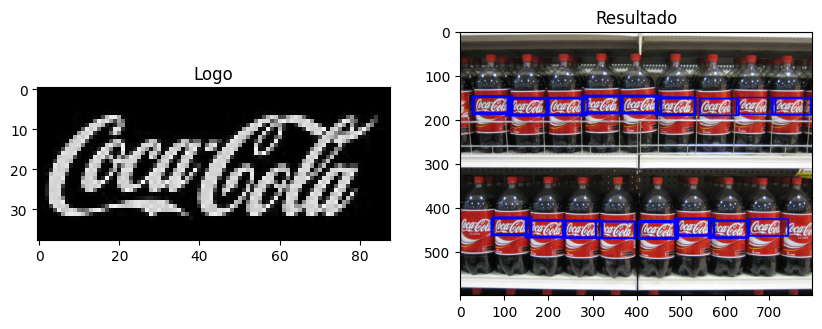

In [201]:
# Uso de la función para detectar logotipos en diferentes imágenes con sus respectivas plantillas
detectar_logos('./images/coca_multi.png', './template/pattern.png', 0.63, 0.222)

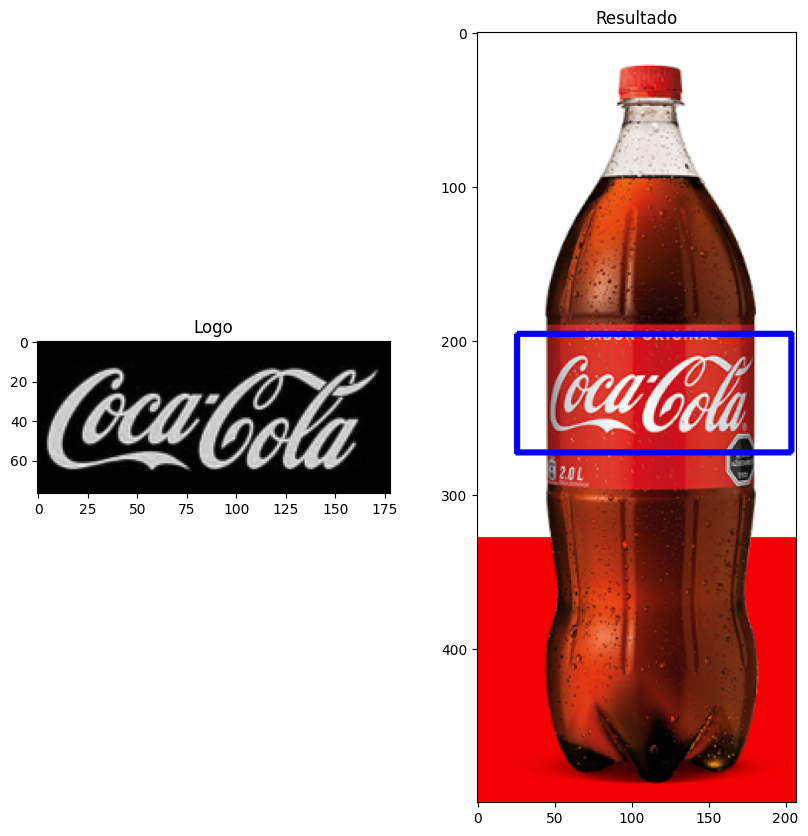

In [237]:
detectar_logos('./images/coca_logo_1.png', './template/pattern.png', 0.547, 0.445)

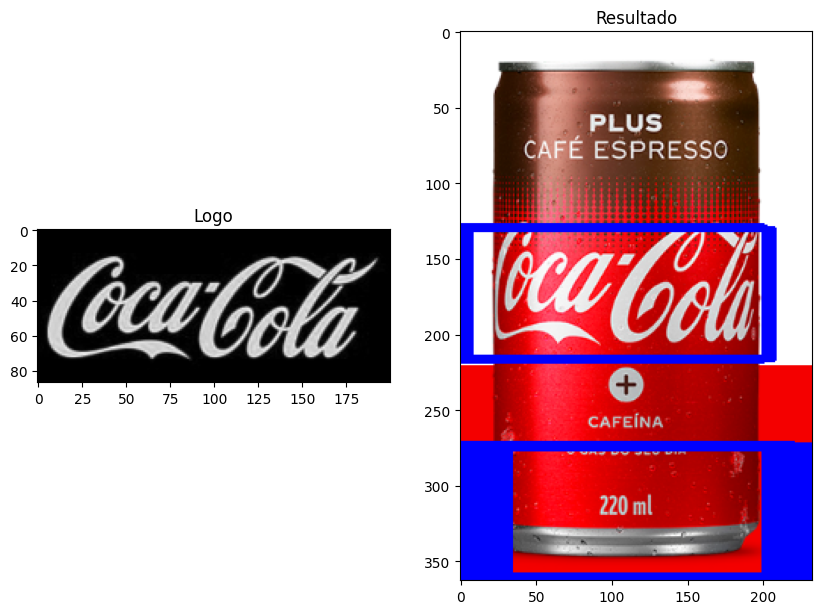

In [396]:
detectar_logos('./images/coca_logo_2.png', './template/pattern.png', 0.47, 0.5)

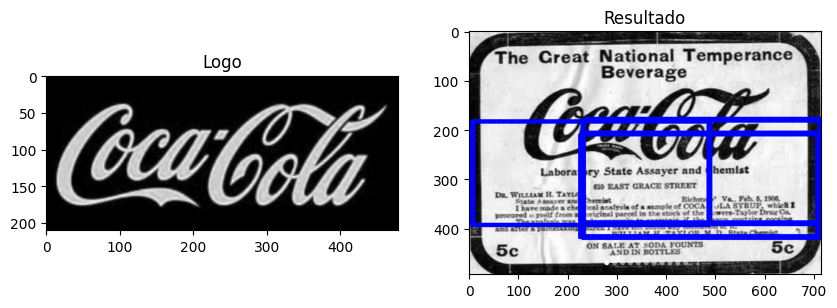

In [386]:
detectar_logos('./images/coca_retro_1.png', './template/pattern.png', 0.54, 1.2)

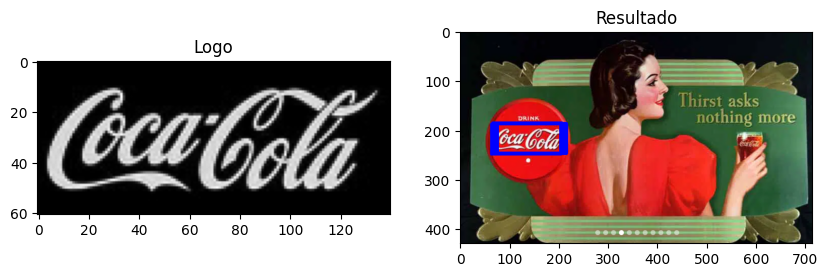

In [348]:
detectar_logos('./images/coca_retro_2.png', './template/pattern.png', 0.615, 0.35)

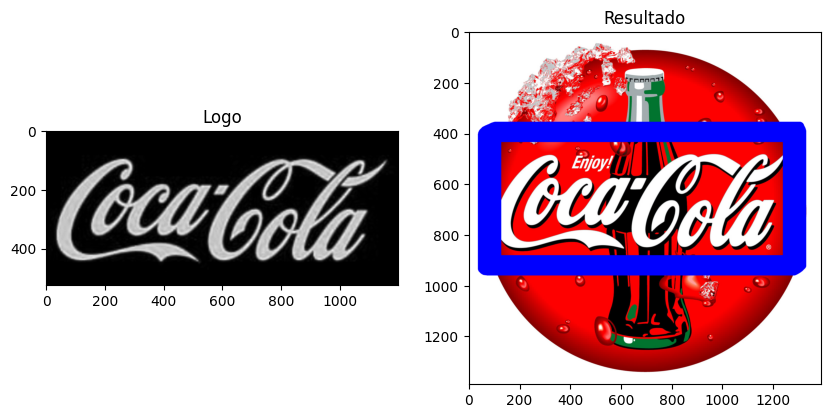

In [357]:
detectar_logos('./images/COCA-COLA-LOGO.jpg', './template/pattern.png', 0.5, 3)

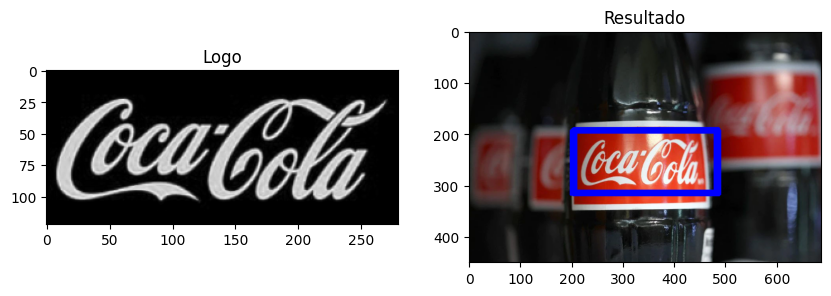

In [372]:
detectar_logos('./images/logo_1.png', './template/pattern.png', 0.6, 0.7)

In [293]:
def read_img():
    img_dir = './images/'
    ext = ['png', 'jpg']
    files = []
    image_gray = []
    images_canny = []
    imgs_color = []

    for filename in os.listdir(img_dir):
        if filename.lower().endswith(tuple(ext)):
            files.append(os.path.join(img_dir, filename))

    for file in files:
        im = cv.imread(file)
        img_color = cv.cvtColor(im, cv.COLOR_BGR2RGB)
        img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
        image_gray.append(img_gray)
        img_canny = cv.Canny(img_gray, 50, 200)
        images_canny.append(img_canny)
        imgs_color.append(img_color)

    return images_canny, image_gray, imgs_color

In [294]:
def detect_logos(image_gray, img_template, umbral=0.63):
    res = cv.matchTemplate(image_gray, img_template, cv.TM_CCORR_NORMED)
    loc = np.where(res >= umbral)
    detections = []
    for pt in zip(*loc[::-1]):
        confidence = res[pt[1], pt[0]]
        detections.append((pt, confidence))
    return detections

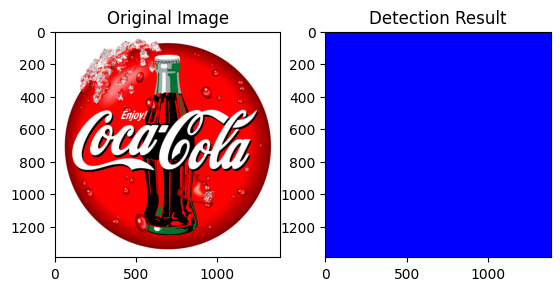

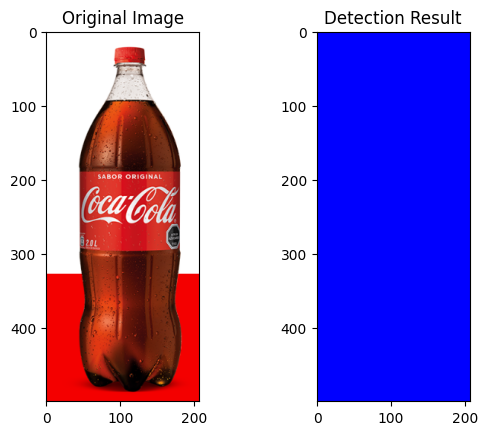

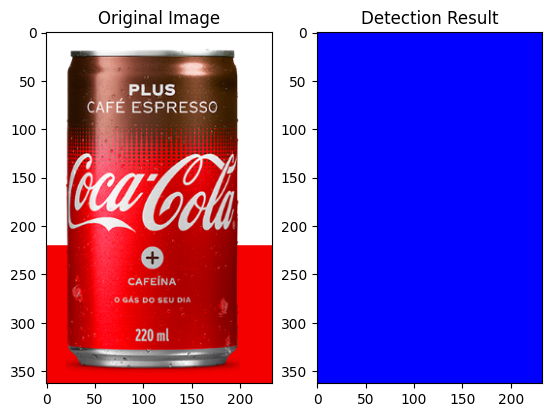

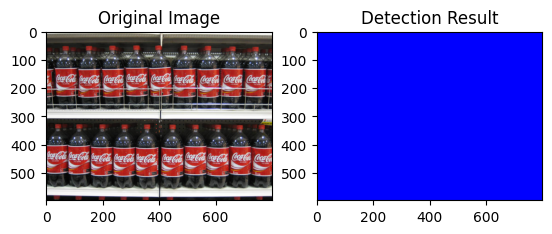

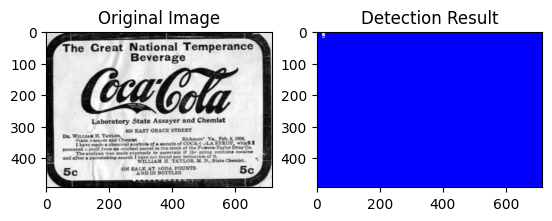

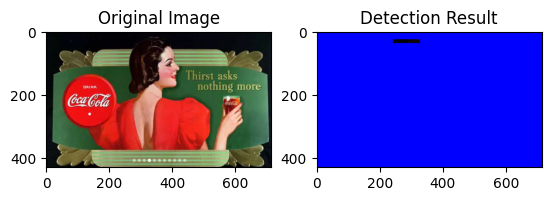

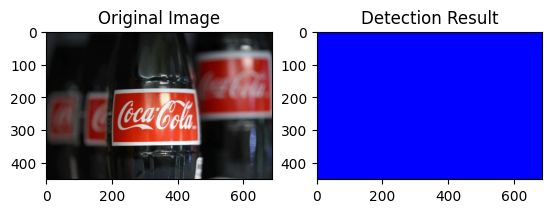

In [297]:
def get_search_regions(img_gray, img_template):
    h_template, w_template = img_template.shape
    h_img, w_img = img_gray.shape
    max_dim = max(h_img, w_img)

    search_regions = []
    for scale in np.linspace(0.222, 3.0, 2)[::-1]:
        new_h, new_w = int(h_template * scale), int(w_template * scale)
        if new_h > 0 and new_w > 0:
            if new_h <= h_img and new_w <= w_img:
                x_start = int((w_img - new_w) / 2)
                y_start = int((h_img - new_h) / 2)
                search_region = img_gray[y_start:y_start + new_h, x_start:x_start + new_w]
                search_regions.append(search_region)
    return search_regions

# Load and preprocess the template image
pattern = cv.imread('./template/pattern.png', 0)

# Read images
images_canny, image_gray, imgs_color = read_img()

# Perform logo detection for each image
for i, img_gray in enumerate(image_gray):
    detections = []
    
    # Get search regions in the image
    search_regions = get_search_regions(img_gray, pattern)
    
    for search_region in search_regions:
        detections.extend(detect_logos(img_gray, search_region))
    
    # Visualize the results
    plt.subplot(121)
    plt.imshow(imgs_color[i])
    plt.title('Original Image')
    
    plt.subplot(122)
    plt.imshow(imgs_color[i])
    plt.title('Detection Result')
    for pt, confidence in detections:
        # Draw bounding box on the image
        h, w = pattern.shape
        color = (0, 0, 255) 
        thickness = 1
        # Draw bounding box on the image
        cv.rectangle(imgs_color[i], pt, (pt[0] + w, pt[1] + h), color, thickness)
    plt.imshow(imgs_color[i])
    plt.show()